In [1]:
!pip install numpngw

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.21617e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


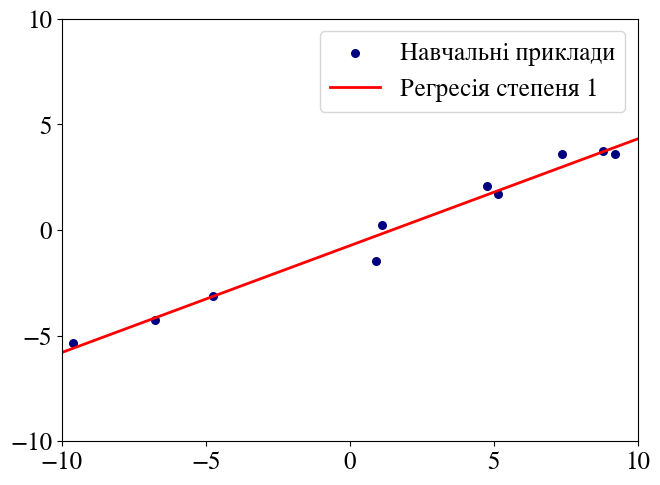

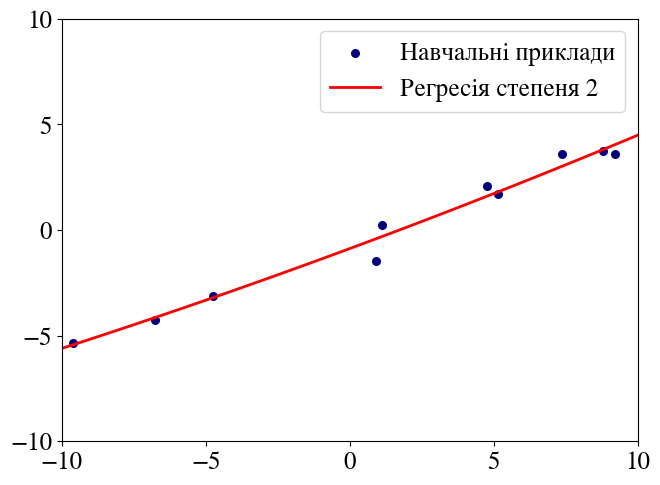

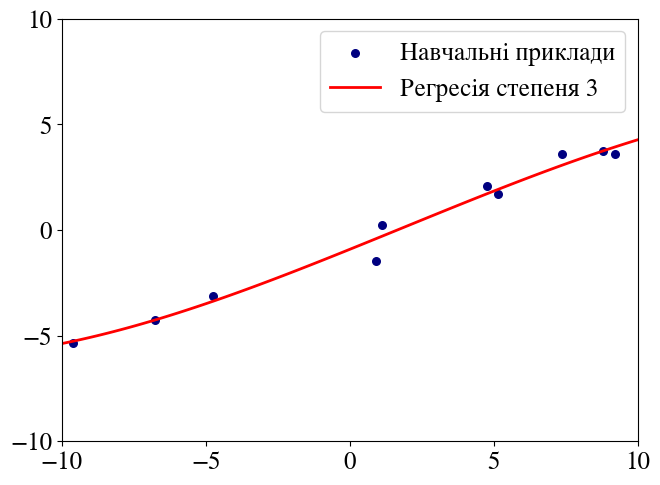

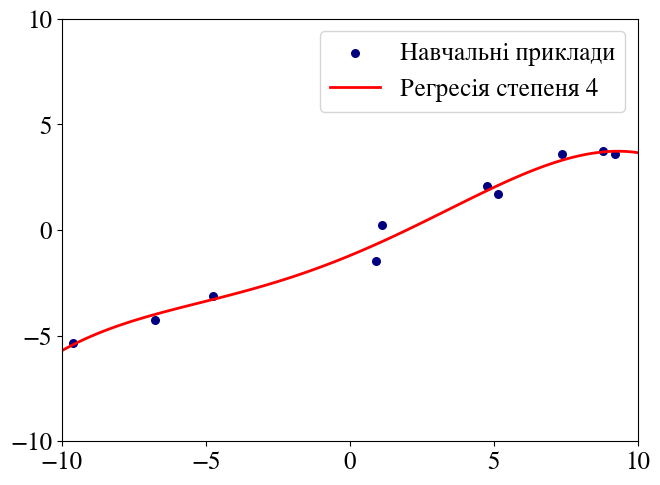

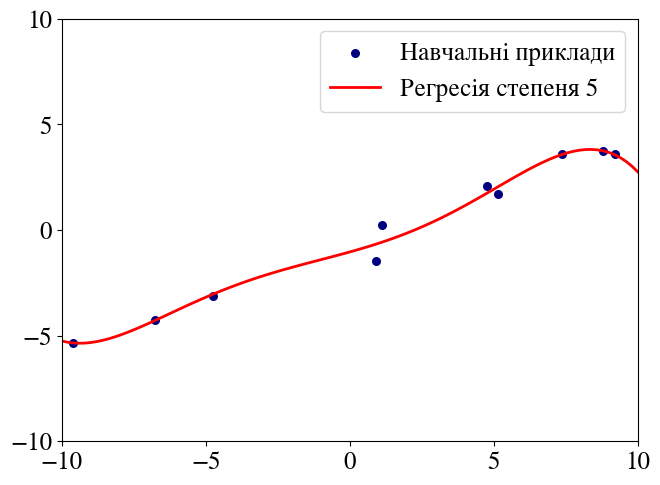

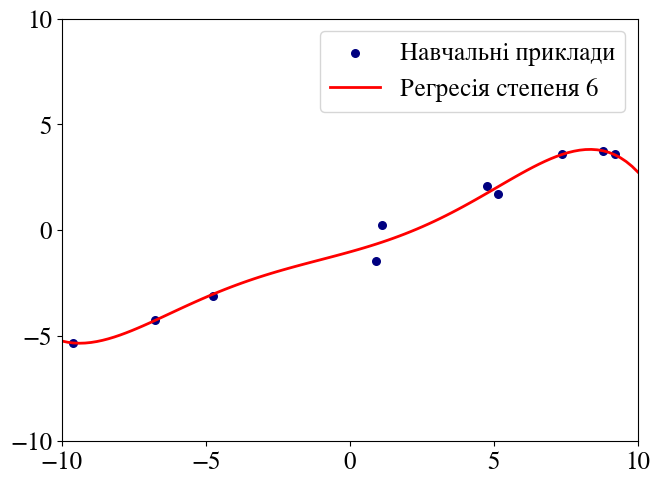

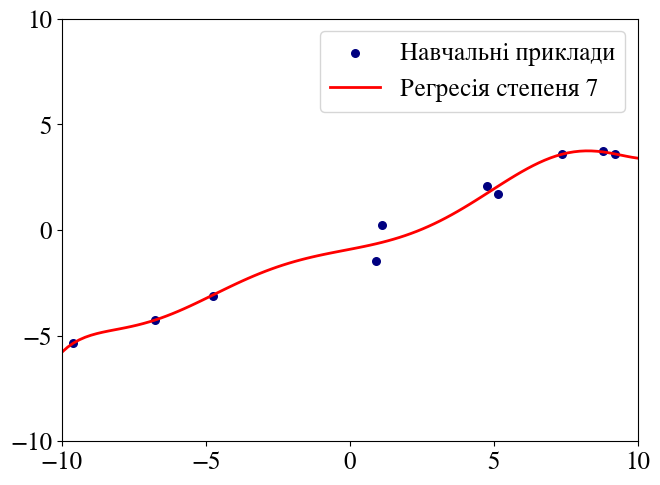

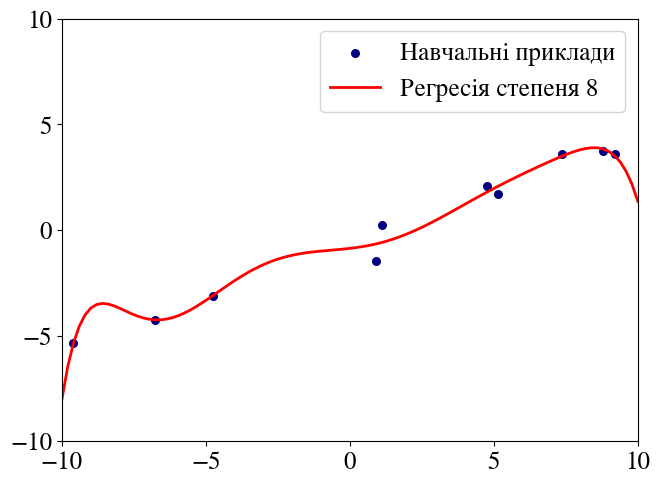

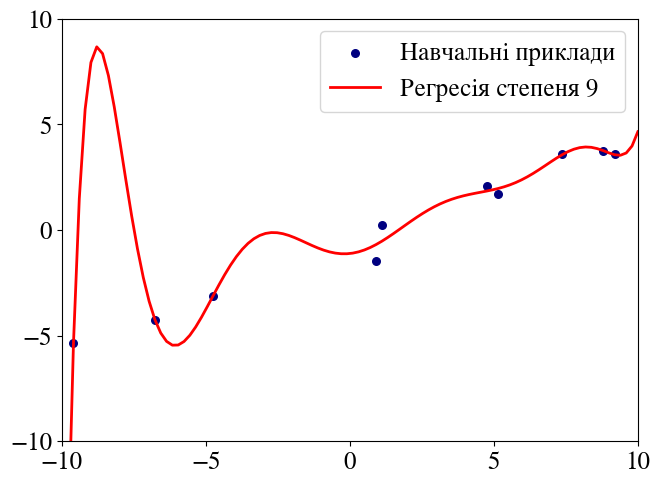

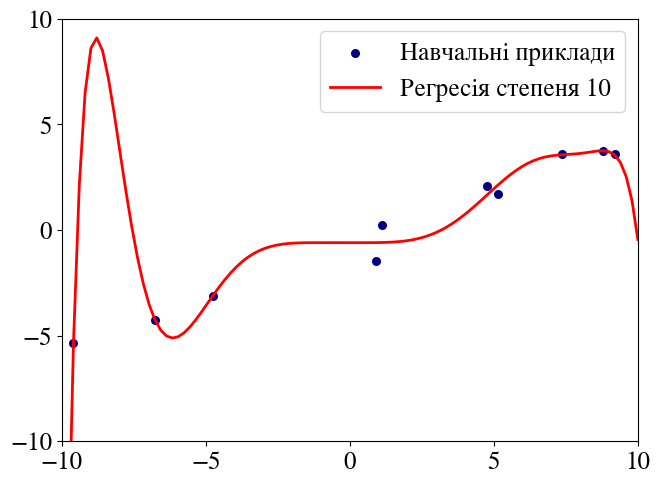

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

def f(x):
    """ function to approximate by polynomial interpolation"""
    return 0.5 * x


# generate points used to plot
x_plot = np.linspace(-10, 10, 100)

# generate points and keep a subset of them
x = np.linspace(-10, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:10])
noize = [(-2 + np.random.random()*2) for i in range(len(x))]
y = f(x) + noize

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['red', 'red']#, 'orange'
lw = 2

def fig2data(fig):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGB values
    """
    # draw the renderer
    fig.canvas.draw()

    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.array(fig.canvas.renderer._renderer)

    return buf

seq = []
type_of_regression = ["linear regression", "regression of degree 10"]
fit = ["fit", "overfit"]
for count, degree in enumerate(range(1,11)):#, 2, 15
    plt.figure(count)
    axes = plt.gca()
    axes.set_xlim([-10,10])
    axes.set_ylim([-10,10])
    plt.scatter(x, y, color='navy', s=30, marker='o', label="Навчальні приклади")
    plt.xticks([-10.0, -5.0, 0.0, 5.0, 10.0])
    plt.yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color='red', linewidth=lw,
             label='Регресія степеня '+ str(degree))

    plt.legend(loc='best')
    plt.tight_layout()
    fig1 = plt.gcf()
    nfig = fig2data(fig1)
    seq.append(nfig)
    fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
    fig1.savefig('linear-regression-' + '.png', dpi=1000, bbox_inches = 'tight', pad_inches = 0)

##    fig1.savefig('../../Illustrations/linear-regression-' + fit[count] + '.eps', format='eps', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
##    fig1.savefig('../../Illustrations/linear-regression-' + fit[count] + '.pdf', format='pdf', dpi=1000, bbox_inches = 'tight', pad_inches = 0)



#plt.show()

# import os
# ## Get the directory address of current python file
# curr_dir = os.path.dirname(os.path.realpath(__file__))
# os.chdir(curr_dir) ## Set the current directory as working directory

## The package used to create gif files
import numpngw
numpngw.write_apng('linear_regression.png',seq,delay = 500)